# Omejen krožni problem treh teles

V nalogi rešujemo problem premikanja sonde Appolo, ki je poslana iz Zemljine orbite na tir z vrnitvijo brez potiska, tako da obkroži Luno in se vrne nazaj v Zemljino orbito.

Rešujemo sistem diferencialnih enačb v koordinatnem sistemu, kjer Zemlja in Luna mirujeta.

Ozančimo z $M$ maso Zemlje in z $m$ maso Lune, enačbe gibanja zapišemo v vrtečem koordinatnem sistemu, kjer masi $M$ in $m$ mirujeta. Torej:

$$
\mu = \frac{m}{M+m} \quad \text{in} \quad \bar{\mu} = \frac{M}{M+m}
$$

Masa $M$ je v točki $(-\mu, 0, 0)$, masa $m$ pa v točki $(1-\mu, 0, 0)$. Oddaljenost sonde pa potem zapišemo z:

$$
R = R(x,y,z) = \sqrt{(x + \mu)^2 + y^2 + z^2} \\
$$
$$
r = r(x,y,z) = \sqrt{(x - 1 + \mu)^2 + y^2 + z^2} \\
$$

Sistem diferencialnih enačb gibanja sonde je:
$$
\begin{align*}
\ddot{x} &= x + 2\dot{y} - \frac{\bar{\mu}}{R^3}(x+\mu) - \frac{\mu}{r^3}(x-\bar{\mu}) \\
\ddot{y} &= y - 2\dot{x} - \frac{\bar{\mu}}{R^3} y - \frac{\mu}{r^3} y \\
\ddot{z} &= -\frac{\bar{\mu}}{R^3} z - \frac{\mu}{r^3} z \\
\end{align*}
$$

Najprej sistem enačb drugega reda prevedemo na sistem prvega reda.

$$
\begin{align*}
\dot{x} &= v_x \quad \dot{y} = v_y \quad \dot{z} = v_z \\
x &= v_x t + x_0 \quad y = v_y t + y_0 \quad z = v_z t + z_0 \\
\dot{v_x} &= x + 2v_y - \frac{\bar{\mu}}{R^3}(x+\mu) - \frac{\mu}{r^3}(x-\bar{\mu}) \\
\dot{v_y} &= x + 2v_y - \frac{\bar{\mu}}{R^3}(x+\mu) - \frac{\mu}{r^3}(x-\bar{\mu}) \\
\dot{v_z} &= y - 2v_x - \frac{\bar{\mu}}{R^3} y - \frac{\mu}{r^3} y \\
\end{align*}
$$

In [20]:
# Dodajanje implementacije v Jupyter notebook
include("../src/main.jl");

In [3]:
# Almost stable 2.75 0.1
EarthRadius=6357.5*10^3
EarthMass=5.972 * 10^24
lowearthorbit = 185 * 10^3 + EarthRadius

earthmoon=384400*10^3
M_radius= 1737.4*10^3
M_mass = 7.34767309 * 10^22

injection_angle = 180.0 * pi/180
inj_alt = (185 * 10^3 + lowearthorbit) / (EarthRadius + M_radius + earthmoon)
pos0 = inj_alt * Vector([cos(injection_angle), sin(injection_angle), 0.0])
speed0 = 15.0
v0 = speed0 * Vector([cos(injection_angle - pi/2.0), sin(injection_angle - pi/2.0), 0.0])

# Stable orbit 6.0 -0.04
x0 = Vector([
    pos0[1], pos0[2], pos0[3],
    v0[1], v0[2], v0[3]]);

In [4]:
mass_earth = 5.974e24;
mass_moon = 7.348e22;
mu = mass_moon / (mass_earth + mass_moon);

init_low = [-0.04, 0.0, 0.0, 0.0, 8.5, 0.0]
init_high = [-0.04, 0.0, 0.0, 0.0, 8.6, 0.0]
best_cond = find_moon_flyby(init_low, init_high, 10000, 1000, 1e-6)
println("Best condition: ", best_cond)

yn, tn = rocket_rk4(dF, best_cond, 0.0001, 10000)
ys = yn[:,2];
xs = yn[:,1];
println("Final position: ", ys[:, end])
flush(stdout)

h: 3.663003663003663e-5
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.9641123297333622, 0.1276891393802685, 0.0]
final_pos: [0.9149797386895785, 0.08549674071525369, 0.0]
f0: -0.9456559475376081f1: -1.1318014691136309 fmid: -1.0404764794048322
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.9149797386895785, 0.08549674071525369, 0.0]
final_pos: [0.888869976686795, 0.06466747339651706, 0.0]
f0: -0.9456559475376081f1: -1.0404764794048322 fmid: -0.9935374500833121
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.888869976686795, 0.06466747339651706, 0.0]
final_pos: [0.8753957740850282, 0.05432172113710373, 0.0]
f0: -0.9456559475376081f1: -0.9935374500833121 fmid: -0.969717495222132
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.8753957740850282, 0.05432172113710373, 0.0]
final_pos: [0.8685505748177119, 0.04916661456984001, 0.0]
f0: -0.9456559475376081f1: -0.969717495222132 fmid: -0.957717189387552
fi

Excessive output truncated after 524296 bytes.


final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
f0: -0.9456559475376081f1: -0.9456559475376081 fmid: -0.9456559475376081
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
f0: -0.9456559475376081f1: -0.9456559475376081 fmid: -0.9456559475376081
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
f0: -0.9456559475376081f1: -0.9456559475376081 fmid: -0.9456559475376081
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
f0: -0.9456559475376081f1: -0.9456559475376081 fmid: -0.9456559475376081
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.8616321292547601, 0.044023818282848, 0.0]
final_pos: [0.8616321292547601, 0.0

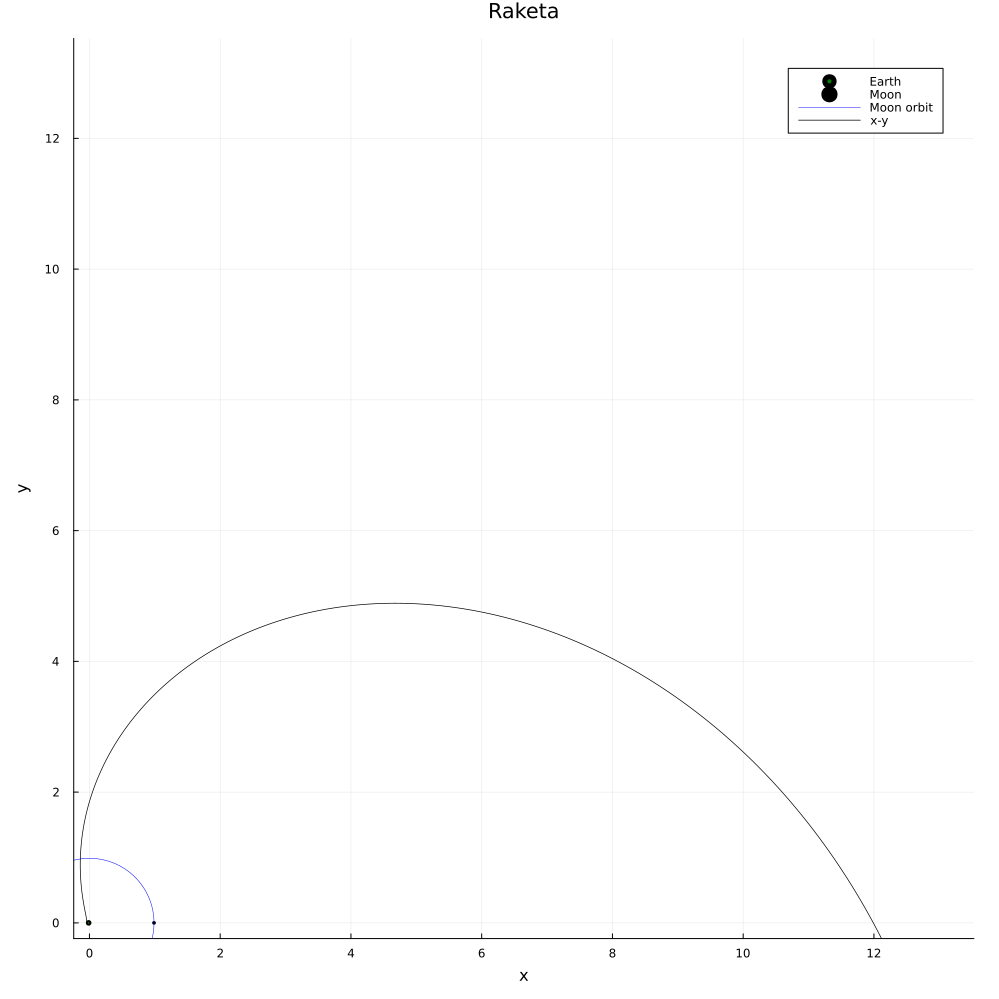

In [21]:
best_cond = [-0.03, 0.0, 0.0, 0.0, 10.6845381, 0.0]
best_cond = [-0.04, 0.0, 0.0, 0.0, 8.525, 0.0]


best_cond = [-0.04, 0.0, 0.0, 0.0, 8.5, 0.0]

yn, tn = rocket_rk4(dF, best_cond, 0.0001, 24000)
ys = yn[:,2];
xs = yn[:,1];
println("Final position: ", ys[:, end])
x_m = (1.0 - mu) * cos.(LinRange(0, 2*pi, 100))
y_m = (1.0 - mu) * sin.(LinRange(0, 2*pi, 100))
xlims = (minimum(xs)-0.1, maximum(xs)+0.1)
println(ys)
scatter([-mu], [0.], label="Earth", color="green", ms=2)
scatter!([1.0-mu], [0.], label="Moon", color="red", ms=1)
plot!(x_m, y_m, label="Moon orbit", color="blue", lw=0.5)
plot!(xs, ys, label="x-y", xlabel="x", ylabel="y", title="Raketa", lw=.7, color="black", aspect_ratio=:equal, xlims=xlims, ylims=xlims, size=(1000, 1000))  